# import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from helpers import parse_variables, get_risk_level, map_to_color

In [2]:
folders = [f for f in os.listdir(f"data/results") if f.startswith('G')]

In [3]:
dfs = []
past_index = 0 
for folder in folders:
    computing_times = pd.read_pickle(f"data/results/complete_geno_{folder}_computingtimes.pkl")
    for scenario in os.listdir(f"data/results/{folder}/pvals"):

        risk = scenario.split('P_vals_risk_')[1].split('_noise_')[0]
        noise = scenario.split('_noise_')[1].split('_ratioeffect_')[0]
        ratio_effect = scenario.split('_ratioeffect_')[1].split('.pkl')[0]
        computing_time = computing_times[[scenario.split('P_vals_')[1].split('.pkl')[0], 'tools']]

        
        path_scen = f"data/results/{folder}/pvals/{scenario}"
        temp = pd.read_pickle(path_scen)
        for tool in list(computing_time['tools']):
            result = computing_time.loc[computing_time['tools'] == tool, scenario.split('P_vals_')[1].split('.pkl')[0]].values[0]
            temp[f"time_{tool}"] = result
            temp['params'] = folder
            temp['risk'] = risk
            temp['noise'] = noise
            temp['ratio_effect'] = ratio_effect
        dfs.append(temp)

In [4]:
concatenated_df = pd.concat(dfs, ignore_index=True)
concatenated_df = concatenated_df.drop(columns = '-logPs')
concatenated_df

,snp,coefs,AFs,-logP_no_corr,-logP_best_corr,-logP_true_pop,-logP_abyss_via_true_pops,-logP_abyss_pq2pq_via_esti_pops,-logP_combined,-logP_PCs,...,params,risk,noise,ratio_effect,time_best_corr,time_true_pop,time_abyss_via_true_pops,time_abyss_pq2pq_via_esti_pops,time_combined,time_PCs
0,CG3,0.141132,0.21,0.237006,0.237006,0.237006,0.237006,0.767946,0.461304,0.306112,...,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,8.474,9.704,9.143,188.408,191.879,11.356
1,CG4,0.106523,0.37,0.212289,0.212289,0.212289,0.212289,0.137542,0.074601,0.476019,...,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,8.474,9.704,9.143,188.408,191.879,11.356
2,CG7,0.352080,0.32,1.174461,1.174461,1.174461,1.174461,0.169862,0.408042,0.537264,...,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,8.474,9.704,9.143,188.408,191.879,11.356
3,CG8,-0.270136,0.42,0.771481,0.771481,0.771481,0.771481,1.183375,1.629765,1.026066,...,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,8.474,9.704,9.143,188.408,191.879,11.356
4,CG14,0.350230,0.3,0.913213,0.913213,0.913213,0.913213,0.549154,1.477620,1.566831,...,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,8.474,9.704,9.143,188.408,191.879,11.356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529017,RG4998,0.221540,0.15,0.613181,0.613181,0.613181,0.613181,0.736043,0.569189,0.363811,...,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,8.624,10.212,9.198,195.068,199.219,12.587
529018,RG4999,0.361710,0.14,1.159649,1.159649,1.159649,1.159649,0.418137,0.029895,0.635048,...,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,8.624,10.212,9.198,195.068,199.219,12.587
529019,RG5000,-0.054005,0.11,0.087021,0.087021,0.087021,0.087021,0.059611,0.129942,0.050872,...,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,8.624,10.212,9.198,195.068,199.219,12.587
529020,VRG694,-0.016117,0.05,0.020763,0.020763,0.020763,0.020763,0.004906,0.068982,0.176277,...,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,8.624,10.212,9.198,195.068,199.219,12.587


In [5]:
relevant_cols = [f for f in list(concatenated_df.columns) if f.startswith('-log')]

In [6]:
dfs = []
for col in relevant_cols:
    new_df = pd.DataFrame()
    new_df[['snp','coefs','AFs']] = concatenated_df[['snp','coefs','AFs']]
    new_df['perf'] = abs(concatenated_df[col] - concatenated_df['-logP_best_corr'])
    new_df['tool'] = col
    new_df['computing_time'] = concatenated_df[f"time_{col.split('-logP_')[1]}"]
    new_df[['params','risk','noise','ratio_effect']] = concatenated_df[['params','risk','noise','ratio_effect']]
    dfs.append(new_df)

In [7]:
df = pd.concat(dfs, ignore_index=True)
# Regular expression to capture the values for G, L, c, k, M, and HWE
df[['G', 'L', 'c', 'k', 'M', 'HWE']] = df['params'].str.extract(r'G(\d+)_L(\d+)_c(\d+)_k(\d+)_M([\d\.]+)_HWE(\d+)')

# Convert the extracted values to appropriate data types
df[['G', 'L', 'c', 'k', 'HWE']] = df[['G', 'L', 'c', 'k', 'HWE']].astype(int)
df['M'] = df['M'].astype(float)
df['nr_humans'] = df['c'] * df['k'] * df['k']
df['nr_snps'] = df['G'] * df['L'] * 1/2

In [8]:
df

,snp,coefs,AFs,perf,tool,computing_time,params,risk,noise,ratio_effect,G,L,c,k,M,HWE,nr_humans,nr_snps
0,CG3,0.141132,0.21,0.000000e+00,-logP_no_corr,6.236,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,100,100,50,1,0.1,1,50,5000.0
1,CG4,0.106523,0.37,1.665335e-16,-logP_no_corr,6.236,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,100,100,50,1,0.1,1,50,5000.0
2,CG7,0.352080,0.32,0.000000e+00,-logP_no_corr,6.236,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,100,100,50,1,0.1,1,50,5000.0
3,CG8,-0.270136,0.42,0.000000e+00,-logP_no_corr,6.236,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,100,100,50,1,0.1,1,50,5000.0
4,CG14,0.350230,0.3,0.000000e+00,-logP_no_corr,6.236,G100_L100_c50_k1_M0.1_HWE1,no_risk,0.1,1,100,100,50,1,0.1,1,50,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703149,RG4998,0.221540,0.15,2.493702e-01,-logP_PCs,12.587,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,100,100,50,1,0.5,1,50,5000.0
3703150,RG4999,0.361710,0.14,5.246007e-01,-logP_PCs,12.587,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,100,100,50,1,0.5,1,50,5000.0
3703151,RG5000,-0.054005,0.11,3.614867e-02,-logP_PCs,12.587,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,100,100,50,1,0.5,1,50,5000.0
3703152,VRG694,-0.016117,0.05,1.555143e-01,-logP_PCs,12.587,G100_L100_c50_k1_M0.5_HWE1,no_risk,0.5,0.5,100,100,50,1,0.5,1,50,5000.0


In [9]:
max_finite_value = df['perf'].replace([np.inf, -np.inf], np.nan).max()
df['perf'] = df['perf'].replace(np.inf, max_finite_value)

In [10]:
change_name_risks = {
    "no_risk": "no environmental risk",
    "NW_risk": "Smooth linear North-West environmental risk",
    "N_risk" : "Smooth linear North environmental risk",
    "blob_risk": "Localised big blob risk",
    "center_risk": "Localised big central risk",
    "big_square_risk": "big square risk",
    "square_risk" : "Tiny square risk",
    'hi_square_risk' : "Tiny square risk",
    "hi_gauss_blob_risk": "Global Gaussian Risk",
    "two_square_risk": "Two tiny risks",
    "gauss_blob_risk" : "Gaussian Risk",
    "three_square_risk": "Three localized Risks",
    "mid_mid_square_risk": "Mid square risk"
}
change_name_tools = {
    '-logP_no_corr':'no correction',
    '-logP_best_corr': 'best correction',
    '-logP_true_pop': 'x/y axis of population grid',
    '-logP_abyss_via_true_pops': 'counted p2, 2pq and q2',
    '-logP_abyss_pq2pq_via_esti_pops': 'estimated p2, 2pq and q2',
    '-logP_combined': "combined Abyss estimation and PC'",
    '-logP_PCs': 'PCs'
}

In [11]:
# Assuming df is your DataFrame
# Replace values in the 'risk' column
df['risk'] = df['risk'].replace(change_name_risks)

# Replace values in the 'tools' column
df['tool'] = df['tool'].replace(change_name_tools)

# Now df will have the updated values in the 'risk' and 'tools' columns


In [12]:
df = df[df['tool'] != 'expected_logP']

In [13]:
# Ensure the AFs column is numeric
df['AFs'] = pd.to_numeric(df['AFs'], errors='coerce')

# Define the fixed points to which we want to round
fixed_points = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Function to round each value in the AFs column to the nearest fixed point
def round_to_fixed_points(value):
    return fixed_points[np.abs(fixed_points - value).argmin()]

# Apply the rounding function to the AFs column and create a new column 'new_AFs'
df['new_AFs'] = df['AFs'].apply(lambda x: round_to_fixed_points(x) if not np.isnan(x) else np.nan)

In [14]:
dfs = []

for uniqueparam in df['params'].unique():
    print(uniqueparam)
    temp1 = df[df['params'] == uniqueparam]
    for uniquerisk in temp1['risk'].unique():
        temp2 = temp1[temp1['risk'] == uniquerisk]
        for uniquetool in temp2['tool'].unique():
            temp3 = temp2[temp2['tool'] == uniquetool]
            for uniquenoise in temp3['noise'].unique():
                temp4 = temp3[temp3['noise'] == uniquenoise]
                for uniqueratio in temp4['ratio_effect'].unique():
                    temp5 = temp4[temp4['ratio_effect'] == uniqueratio]
                    for unique_maf in temp5['new_AFs'].unique():
                        temp6 = temp5[temp5['new_AFs'] == unique_maf]
                       # Create a dictionary for the new row
                        new_row = {
                            'perf': temp6['perf'].mean(),
                            'computing_time': temp6['computing_time'].mean(),
                            'tool': uniquetool,
                            'risk': uniquerisk,
                            'noise': uniquenoise,
                            'ratio_effect': uniqueratio,
                            'AFs': unique_maf,
                            'params': uniqueparam
                        }
                        
                        # Convert the dictionary into a DataFrame with one row and append it
                        new_df = pd.DataFrame([new_row])
                        dfs.append(new_df)

G100_L100_c50_k1_M0.1_HWE1
G100_L100_c50_k4_M0.1_HWE1
G100_L100_c50_k2_M0.5_HWE1
G100_L100_c50_k2_M0.1_HWE1
G100_L100_c50_k1_M0.5_HWE1


In [15]:
df = pd.concat(dfs, ignore_index=True)
df

,perf,computing_time,tool,risk,noise,ratio_effect,AFs,params
0,4.531416e-17,6.236,no correction,no environmental risk,0.1,1,0.2,G100_L100_c50_k1_M0.1_HWE1
1,3.505782e-17,6.236,no correction,no environmental risk,0.1,1,0.4,G100_L100_c50_k1_M0.1_HWE1
2,5.271697e-17,6.236,no correction,no environmental risk,0.1,1,0.3,G100_L100_c50_k1_M0.1_HWE1
3,5.618380e-17,6.236,no correction,no environmental risk,0.1,1,0.5,G100_L100_c50_k1_M0.1_HWE1
4,4.016333e-17,6.236,no correction,no environmental risk,0.1,1,0.1,G100_L100_c50_k1_M0.1_HWE1
...,...,...,...,...,...,...,...,...
4545,2.258759e-01,11.018,PCs,Three localized Risks,0.5,0,0.2,G100_L100_c50_k1_M0.5_HWE1
4546,2.246836e-01,11.018,PCs,Three localized Risks,0.5,0,0.3,G100_L100_c50_k1_M0.5_HWE1
4547,1.737192e-01,11.018,PCs,Three localized Risks,0.5,0,0.5,G100_L100_c50_k1_M0.5_HWE1
4548,2.251295e-01,11.018,PCs,Three localized Risks,0.5,0,0.4,G100_L100_c50_k1_M0.5_HWE1


In [16]:
# Regular expression to capture the values for G, L, c, k, M, and HWE
df[['G', 'L', 'c', 'k', 'M', 'HWE']] = df['params'].str.extract(r'G(\d+)_L(\d+)_c(\d+)_k(\d+)_M([\d\.]+)_HWE(\d+)')

# Convert the extracted values to appropriate data types
df[['G', 'L', 'c', 'k', 'HWE']] = df[['G', 'L', 'c', 'k', 'HWE']].astype(int)
df['M'] = df['M'].astype(float)
df['nr_humans'] = df['c'] * df['k'] * df['k']
df['nr_snps'] = df['G'] * df['L'] * 1/2

In [17]:
df

,perf,computing_time,tool,risk,noise,ratio_effect,AFs,params,G,L,c,k,M,HWE,nr_humans,nr_snps
0,4.531416e-17,6.236,no correction,no environmental risk,0.1,1,0.2,G100_L100_c50_k1_M0.1_HWE1,100,100,50,1,0.1,1,50,5000.0
1,3.505782e-17,6.236,no correction,no environmental risk,0.1,1,0.4,G100_L100_c50_k1_M0.1_HWE1,100,100,50,1,0.1,1,50,5000.0
2,5.271697e-17,6.236,no correction,no environmental risk,0.1,1,0.3,G100_L100_c50_k1_M0.1_HWE1,100,100,50,1,0.1,1,50,5000.0
3,5.618380e-17,6.236,no correction,no environmental risk,0.1,1,0.5,G100_L100_c50_k1_M0.1_HWE1,100,100,50,1,0.1,1,50,5000.0
4,4.016333e-17,6.236,no correction,no environmental risk,0.1,1,0.1,G100_L100_c50_k1_M0.1_HWE1,100,100,50,1,0.1,1,50,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,2.258759e-01,11.018,PCs,Three localized Risks,0.5,0,0.2,G100_L100_c50_k1_M0.5_HWE1,100,100,50,1,0.5,1,50,5000.0
4546,2.246836e-01,11.018,PCs,Three localized Risks,0.5,0,0.3,G100_L100_c50_k1_M0.5_HWE1,100,100,50,1,0.5,1,50,5000.0
4547,1.737192e-01,11.018,PCs,Three localized Risks,0.5,0,0.5,G100_L100_c50_k1_M0.5_HWE1,100,100,50,1,0.5,1,50,5000.0
4548,2.251295e-01,11.018,PCs,Three localized Risks,0.5,0,0.4,G100_L100_c50_k1_M0.5_HWE1,100,100,50,1,0.5,1,50,5000.0


In [18]:
def sorting_df(df, to_sort, sort_by):
    mean_perf = df.groupby(to_sort)[sort_by].mean()
    print(mean_perf)
    sorted_list = mean_perf.sort_values(ascending=False).index.tolist()
    return sorted_list

In [19]:
np.isinf(df['perf']).any()

False

In [20]:
df.groupby('tool')['perf'].mean()

tool
PCs                                  0.454137
best correction                      0.000000
combined Abyss estimation and PC'    0.339347
counted p2, 2pq and q2               0.174335
estimated p2, 2pq and q2             0.337757
no correction                        1.320043
x/y axis of population grid          0.505626
Name: perf, dtype: float64

tool
PCs                                  0.454137
best correction                      0.000000
combined Abyss estimation and PC'    0.339347
counted p2, 2pq and q2               0.174335
estimated p2, 2pq and q2             0.337757
no correction                        1.320043
x/y axis of population grid          0.505626
Name: perf, dtype: float64


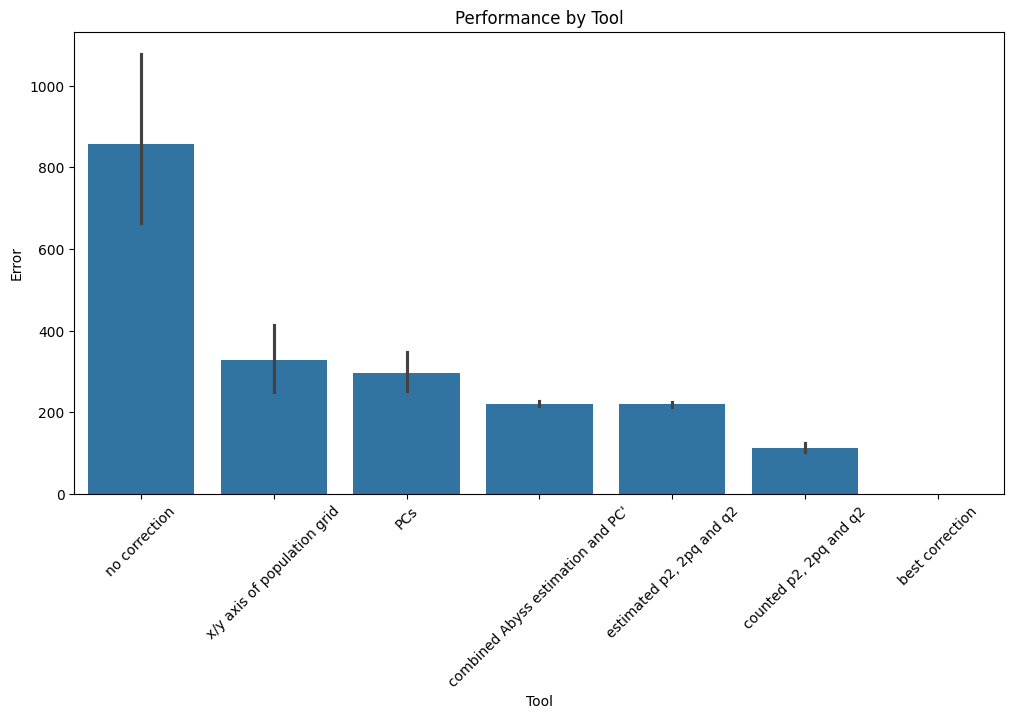

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                                  0.454137
best correction                      0.000000
combined Abyss estimation and PC'    0.339347
counted p2, 2pq and q2               0.174335
estimated p2, 2pq and q2             0.337757
no correction                        1.320043
x/y axis of population grid          0.505626
Name: perf, dtype: float64
noise
0.1    0.587169
0.5    0.307472
Name: perf, dtype: float64


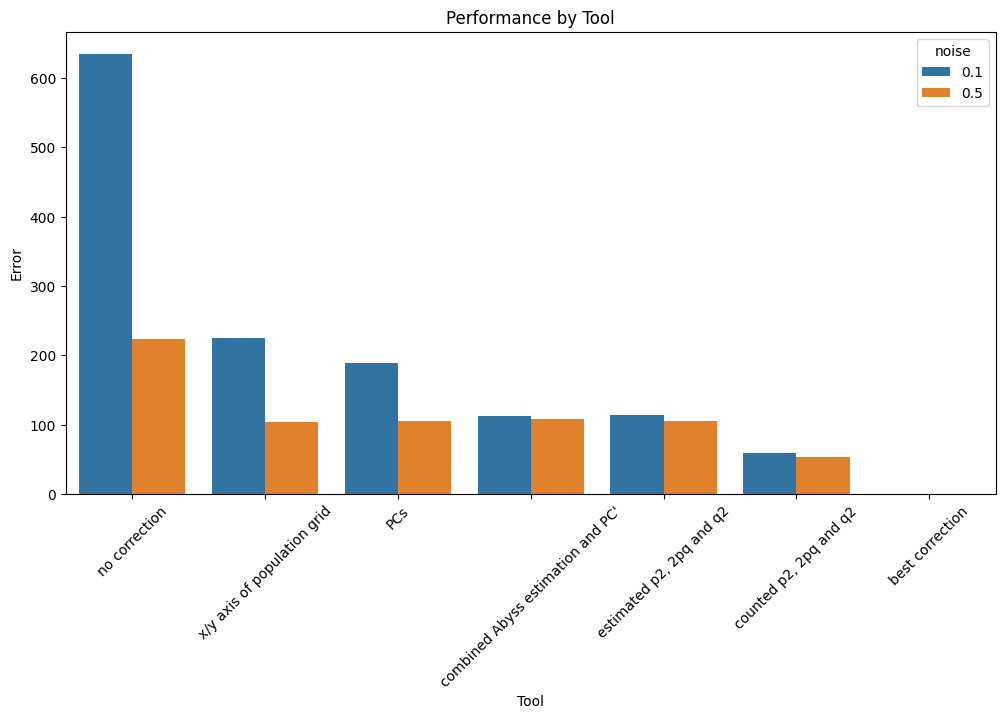

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'noise',hue_order=sorting_df(to_use, 'noise', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                                  0.454137
best correction                      0.000000
combined Abyss estimation and PC'    0.339347
counted p2, 2pq and q2               0.174335
estimated p2, 2pq and q2             0.337757
no correction                        1.320043
x/y axis of population grid          0.505626
Name: perf, dtype: float64
risk
Global Gaussian Risk                           1.025573
Localised big blob risk                        0.279449
Smooth linear North-West environmental risk    0.405578
Three localized Risks                          0.448645
Tiny square risk                               0.487980
no environmental risk                          0.173573
Name: perf, dtype: float64


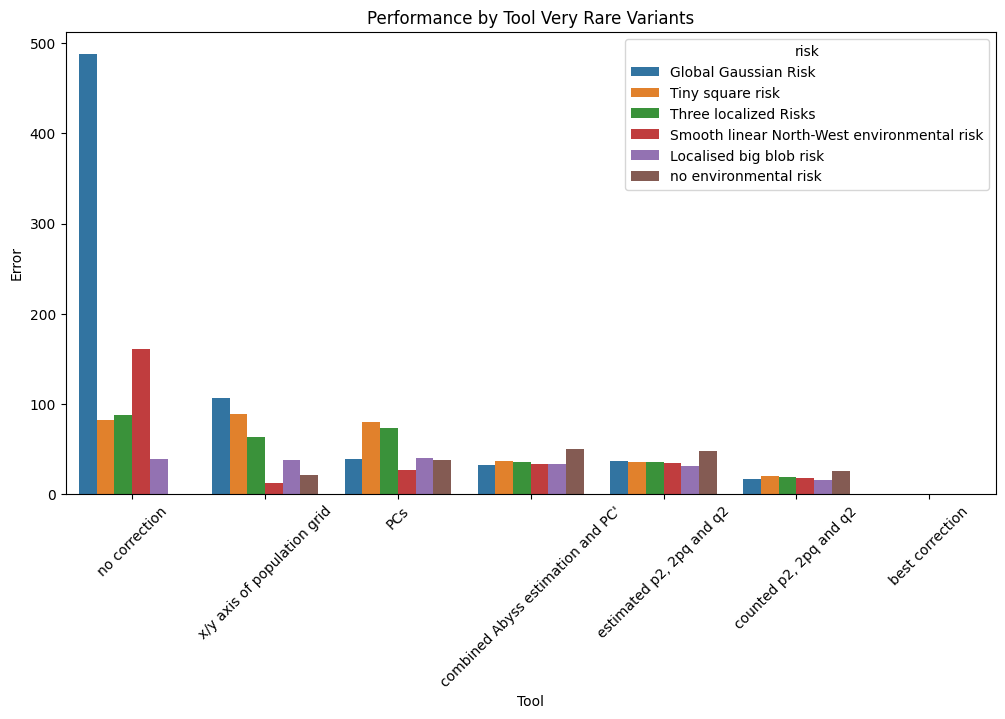

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'risk',hue_order=sorting_df(to_use, 'risk', 'perf'))

plt.title('Performance by Tool Very Rare Variants')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                                  0.454137
best correction                      0.000000
combined Abyss estimation and PC'    0.339347
counted p2, 2pq and q2               0.174335
estimated p2, 2pq and q2             0.337757
no correction                        1.320043
x/y axis of population grid          0.505626
Name: perf, dtype: float64
AFs
0.1    0.184110
0.2    0.249644
0.3    0.555425
0.4    0.629777
0.5    0.617648
Name: perf, dtype: float64


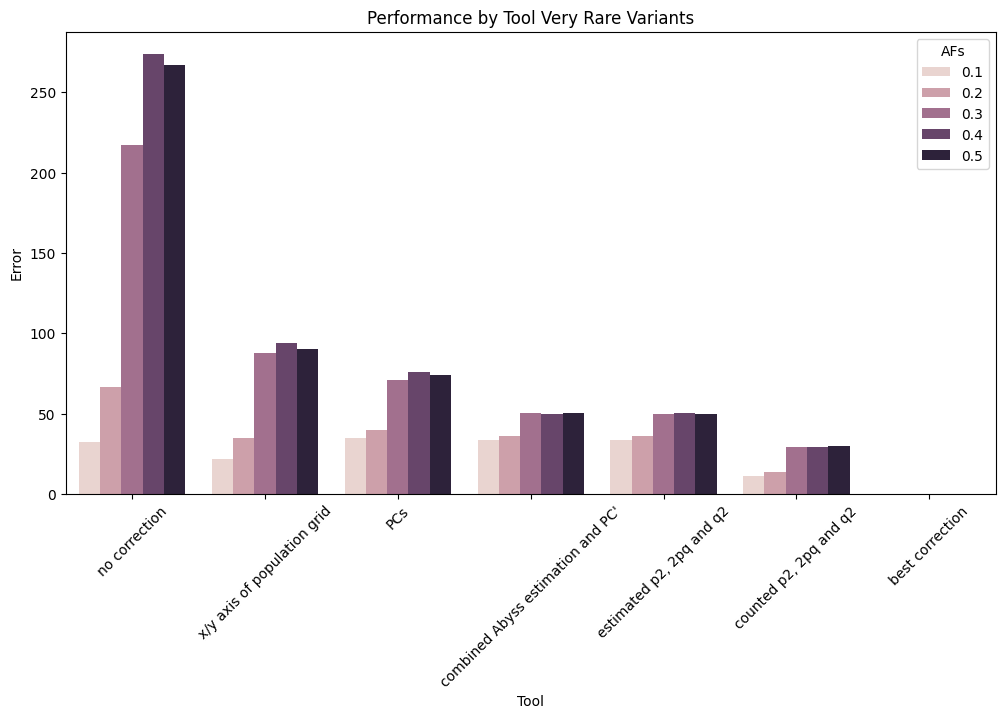

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'AFs',hue_order=sorting_df(to_use, 'AFs', 'perf'))

plt.title('Performance by Tool Very Rare Variants')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = result.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'M',hue_order=sorting_df(to_use, 'k', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'groupby'

<Figure size 1200x600 with 0 Axes>